In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from osgeo import gdal

In [3]:
import matplotlib.pyplot as plt

In [6]:
dataset = gdal.Open('/content/drive/MyDrive/GIS/utica/u_train/train_1.tif', gdal.GA_ReadOnly)

In [7]:
band = dataset.GetRasterBand(1)

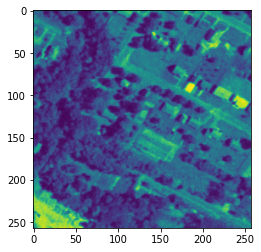

In [8]:
plt.imshow(band.ReadAsArray())